<a href="https://colab.research.google.com/github/Molly-Abisage/IP4-ECS-blue-cars/blob/master/week4_IP_molly_abisage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# * RESEARCH QUESTION AND METRICS FOR SUCCESS




 NULL HYPOTHESIS:H0: Teusday does not have the highest sum of taken bluecars.

 ALTERNATIVE HYPOTHESIS:H1:Teusday has the highest sum of taken bluecars 

 
 
 Understanding the context and carrying out experimental Design such as:
choosing a good sampling method

Hypothesis testing

Univariate Analysis

Bivariate Analysis

Multivariate Analysis

Create bar graphs, histo graphs, line, scatter plots, heatmaps correlations for the inorder to get insights

Identifying the z_score in to compare with the significant value

In [ ]:
#IMPORTING LIBRARIES

## Importing libraries

#Import pandas
import pandas as pd

#Importing numpy
import numpy as np

# Import matplotlid
import matplotlib.pyplot as plt
%matplotlib inline

##Import seaborn
import seaborn as sns




In [ ]:
# Loading the dataset
autolib_pc = pd.read_csv("autolib_pc.csv")
autolib_pc.head()



,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
#Load the the dictionary to the dataset

autolib_dic = pd.read_excel("/content/columns_explanation.xlsx")
autolib_dic

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [ ]:
# Check the data size

len(autolib_pc)

16085

In [ ]:
# Checking the dataset shape

autolib_pc.shape

(16085, 13)

In [ ]:
# View information of our data
autolib_pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [ ]:
# checking the datatypes in the dataset
autolib_pc.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

# TIDY THE DATASET

In [ ]:
# View the column names in the dataset

autolib_pc.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [ ]:
# Lets remove the spaces and replace with _, also change the names to lower case


autolib_pc.columns = autolib_pc.columns.str.lower().str.replace(' ', '_')
autolib_pc.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [ ]:
# lets check i there are any null values in the dataset
autolib_pc.isnull().sum()

## There are no null values on this dataset

postal_code               0
date                      0
n_daily_data_points       0
dayofweek                 0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

In [ ]:
# lets check total sum of duplicate values in the dataset
autolib_pc.duplicated().sum()


0

In [ ]:
# lets change the date column to datetime and preview the dataset
autolib_pc.date = pd.to_datetime(autolib_pc.date)

autolib_pc.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,2018-01-02,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,2018-01-03,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,2018-01-04,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,2018-01-05,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
# Let's then drop the columns we are ot going to use in analysis. i.e day_type and n_daily_data_points

autolib_pc.drop(columns=['n_daily_data_points', 'day_type'], axis=1, inplace=True)

In [ ]:
# Find and deal with OUTLIERS, ANOMALIES within the dataset.


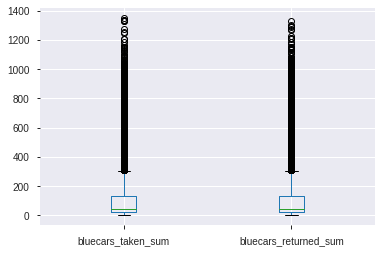

In [ ]:
# lets check outliers in boxplot, column bluecars_taken_sum and the blucars_returned_sum

boxplot = autolib_pc.boxplot(["bluecars_taken_sum","bluecars_returned_sum"])
plt.show()

#comment: there are outliers in the two columns. choosen not to drop outliers because the total no of bluecars is 1400.

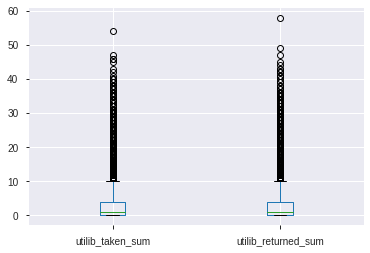

In [ ]:
# then check for outliers in the utilib cars both taken and returned

boxplot = autolib_pc.boxplot(["utilib_taken_sum","utilib_returned_sum"])
plt.show()

coment: The columns have outliers but these they are ones we can work with since they fall in the total sum range.

In [ ]:
#NORMALITY CHECK

from scipy.stats import shapiro

testdata = autolib_pc['bluecars_taken_sum']
stat, p = shapiro(testdata)

('stat=%.2f, p=%.30f' %(stat, p))
if p > 0.05:
  print('Normal distribution')
else:
  print('Not a normal distribution')


Not a normal distribution


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# **SAMPLE** **AND EDA**

In [ ]:
# We are going to applies a function that puts each subset into a random sample with a size of 16085 with a confidence interval 0f 5 and confidence level of 99%.
#The beauty about this method is that it strictly maintains the populations proportion.

# Stratified sample
strat_auto = autolib_pc.groupby('bluecars_taken_sum', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1609))

# proportion of the non_stratified sample
print(strat_auto['bluecars_taken_sum'].value_counts())

# Check the stratified output
print(strat_auto)

12     42
14     41
11     40
9      40
10     38
       ..
209     1
211     1
213     1
215     1
816     1
Name: bluecars_taken_sum, Length: 535, dtype: int64
       postal_code       date  ...  slots_freed_sum  slots_taken_sum
12323        93440 2018-05-31  ...                0                0
11981        93390 2018-02-01  ...                0                0
11940        93370 2018-06-07  ...                0                0
7328         92290 2018-06-19  ...                0                0
4109         91370 2018-02-24  ...                0                0
...            ...        ...  ...              ...              ...
2192         75015 2018-01-09  ...              186              193
2436         75016 2018-04-10  ...              175              172
2214         75015 2018-01-31  ...              226              235
2381         75016 2018-02-11  ...              219              218
2385         75016 2018-02-15  ...              213              215

[2497 row

In [ ]:
#preview our sample dataset
strat_auto.head()

,postal_code,date,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
12323,93440,2018-05-31,3,0,1,1,1,1,0,0,0
11981,93390,2018-02-01,3,0,1,0,0,0,0,0,0
11940,93370,2018-06-07,3,0,2,0,1,0,0,0,0
7328,92290,2018-06-19,1,0,2,0,0,1,0,0,0
4109,91370,2018-02-24,5,0,2,0,0,1,0,0,0


In [ ]:
strat_auto.shape

#COMMENT:now we have a sample size of 2497 therefore we can begin EDA.

(2497, 11)

**UNIVARIATE ANALYSIS**

In [ ]:
# Lets look at the sum of bluecars taken in each day of the week

strat_auto.groupby('dayofweek')[['bluecars_taken_sum']].sum().sort_values('bluecars_taken_sum', ascending=False)

#comment:the most of blue cars are taken on Friday--total of 288546.
#the fewest cars are hired on Wednesday-- total of 261849


,bluecars_taken_sum
dayofweek,
5,40484
4,40123
3,38727
1,37542
0,37401
6,33838
2,29836


In [ ]:
# now lets check for the total no. of bluecars returned in each day of the week

autolib_pc.groupby('dayofweek')[['bluecars_returned_sum']].sum().sort_values('bluecars_returned_sum', ascending=False)

,bluecars_returned_sum
dayofweek,
5,351570
6,338795
4,286029
0,264808
3,262961
2,260673
1,260470


In [ ]:
#Now since we only need Monday-Friday, we map the days 0-4
strat_auto.dayofweek = strat_auto.dayofweek.map({0:'monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday'})


In [ ]:
# lets check the frequency table of bluecars_returned_sum

strat_auto['dayofweek'].value_counts()


Friday       376
monday       372
Tuesday      369
Thursday     369
Wednesday    328
Name: dayofweek, dtype: int64

MEAN, MEDIAN, MODE, VARIANCE, STANDARD DEVIATION


In [ ]:
#since we are focusing on bluecars only.. lets find mean of taken and returned as well as the slots available and taken

mean = [ 'slots_freed_sum', 'slots_taken_sum', 'bluecars_returned_sum', 'bluecars_taken_sum']

for column in mean:
  print('mean of {}: {:.2f}' .format(column, strat_auto[column].mean()))

mean of slots_freed_sum: 16.08
mean of slots_taken_sum: 16.10
mean of bluecars_returned_sum: 103.20
mean of bluecars_taken_sum: 103.30


In [ ]:
# calculating median for the same.

median = ['bluecars_returned_sum', 'bluecars_taken_sum', 'slots_freed_sum', 'slots_taken_sum']

for column in median:
  print('Median of %s: %d' % (column, strat_auto[column].median()))

Median of bluecars_returned_sum: 43
Median of bluecars_taken_sum: 44
Median of slots_freed_sum: 0
Median of slots_taken_sum: 0


In [ ]:
# calculate mode for the same

mode = ['bluecars_returned_sum', 'bluecars_taken_sum', 'slots_freed_sum', 'slots_taken_sum']

for column in mode:
  print('mode of %s: %d' % (column, strat_auto[column].mode()))

mode of bluecars_returned_sum: 13
mode of bluecars_taken_sum: 12
mode of slots_freed_sum: 0
mode of slots_taken_sum: 0


In [ ]:
# Variance

strat_auto.var(axis=0)

postal_code               5.150941e+07
bluecars_taken_sum        2.025905e+04
bluecars_returned_sum     2.024714e+04
utilib_taken_sum          2.215471e+01
utilib_returned_sum       2.248473e+01
utilib_14_taken_sum       1.040915e+02
utilib_14_returned_sum    1.041440e+02
slots_freed_sum           1.580833e+03
slots_taken_sum           1.593720e+03
dtype: float64

In [ ]:
#standard deviation

strat_auto.std(axis=0)

postal_code               7177.005333
bluecars_taken_sum         142.334304
bluecars_returned_sum      142.292454
utilib_taken_sum             4.706880
utilib_returned_sum          4.741806
utilib_14_taken_sum         10.202524
utilib_14_returned_sum      10.205098
slots_freed_sum             39.759694
slots_taken_sum             39.921422
dtype: float64

In [ ]:
#IQR

strat_auto.quantile([0.25,0.5,0.75])

,postal_code,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0.25,92100.0,19.0,19.0,0.0,0.0,1.0,1.0,0.0,0.0
0.50,92380.0,44.0,43.0,1.0,1.0,3.0,3.0,0.0,0.0
0.75,93440.0,114.0,115.0,4.0,4.0,8.0,8.0,3.0,3.0


In [ ]:
#RANGE. the minimum and maximum difference
range_auto = strat_auto.max()
range_auto1 = strat_auto.min()

print(range_auto - range_auto1)


postal_code                           20879
date                      169 days 00:00:00
bluecars_taken_sum                      867
bluecars_returned_sum                   871
utilib_taken_sum                         35
utilib_returned_sum                      34
utilib_14_taken_sum                      75
utilib_14_returned_sum                   74
slots_freed_sum                         241
slots_taken_sum                         238
dtype: object


In [ ]:
strat_auto.groupby("dayofweek")["dayofweek"].count().plot(kind = 'bar')

#this shows the number of entries of each day according to my sample
#most data was collected in Tuesday which is represented by 1.


**BIVARIATE** **ANALYSIS**

In [ ]:
df1=strat_auto
df1.head(3)

,postal_code,date,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
12323,93440,2018-05-31,Thursday,0,1,1,1,1,0,0,0
11981,93390,2018-02-01,Thursday,0,1,0,0,0,0,0,0
11940,93370,2018-06-07,Thursday,0,2,0,1,0,0,0,0


In [ ]:
df1.groupby("dayofweek")["bluecars_taken_sum"].count().plot(kind = 'bar')

NameError: ignored

<Figure size 576x576 with 0 Axes>

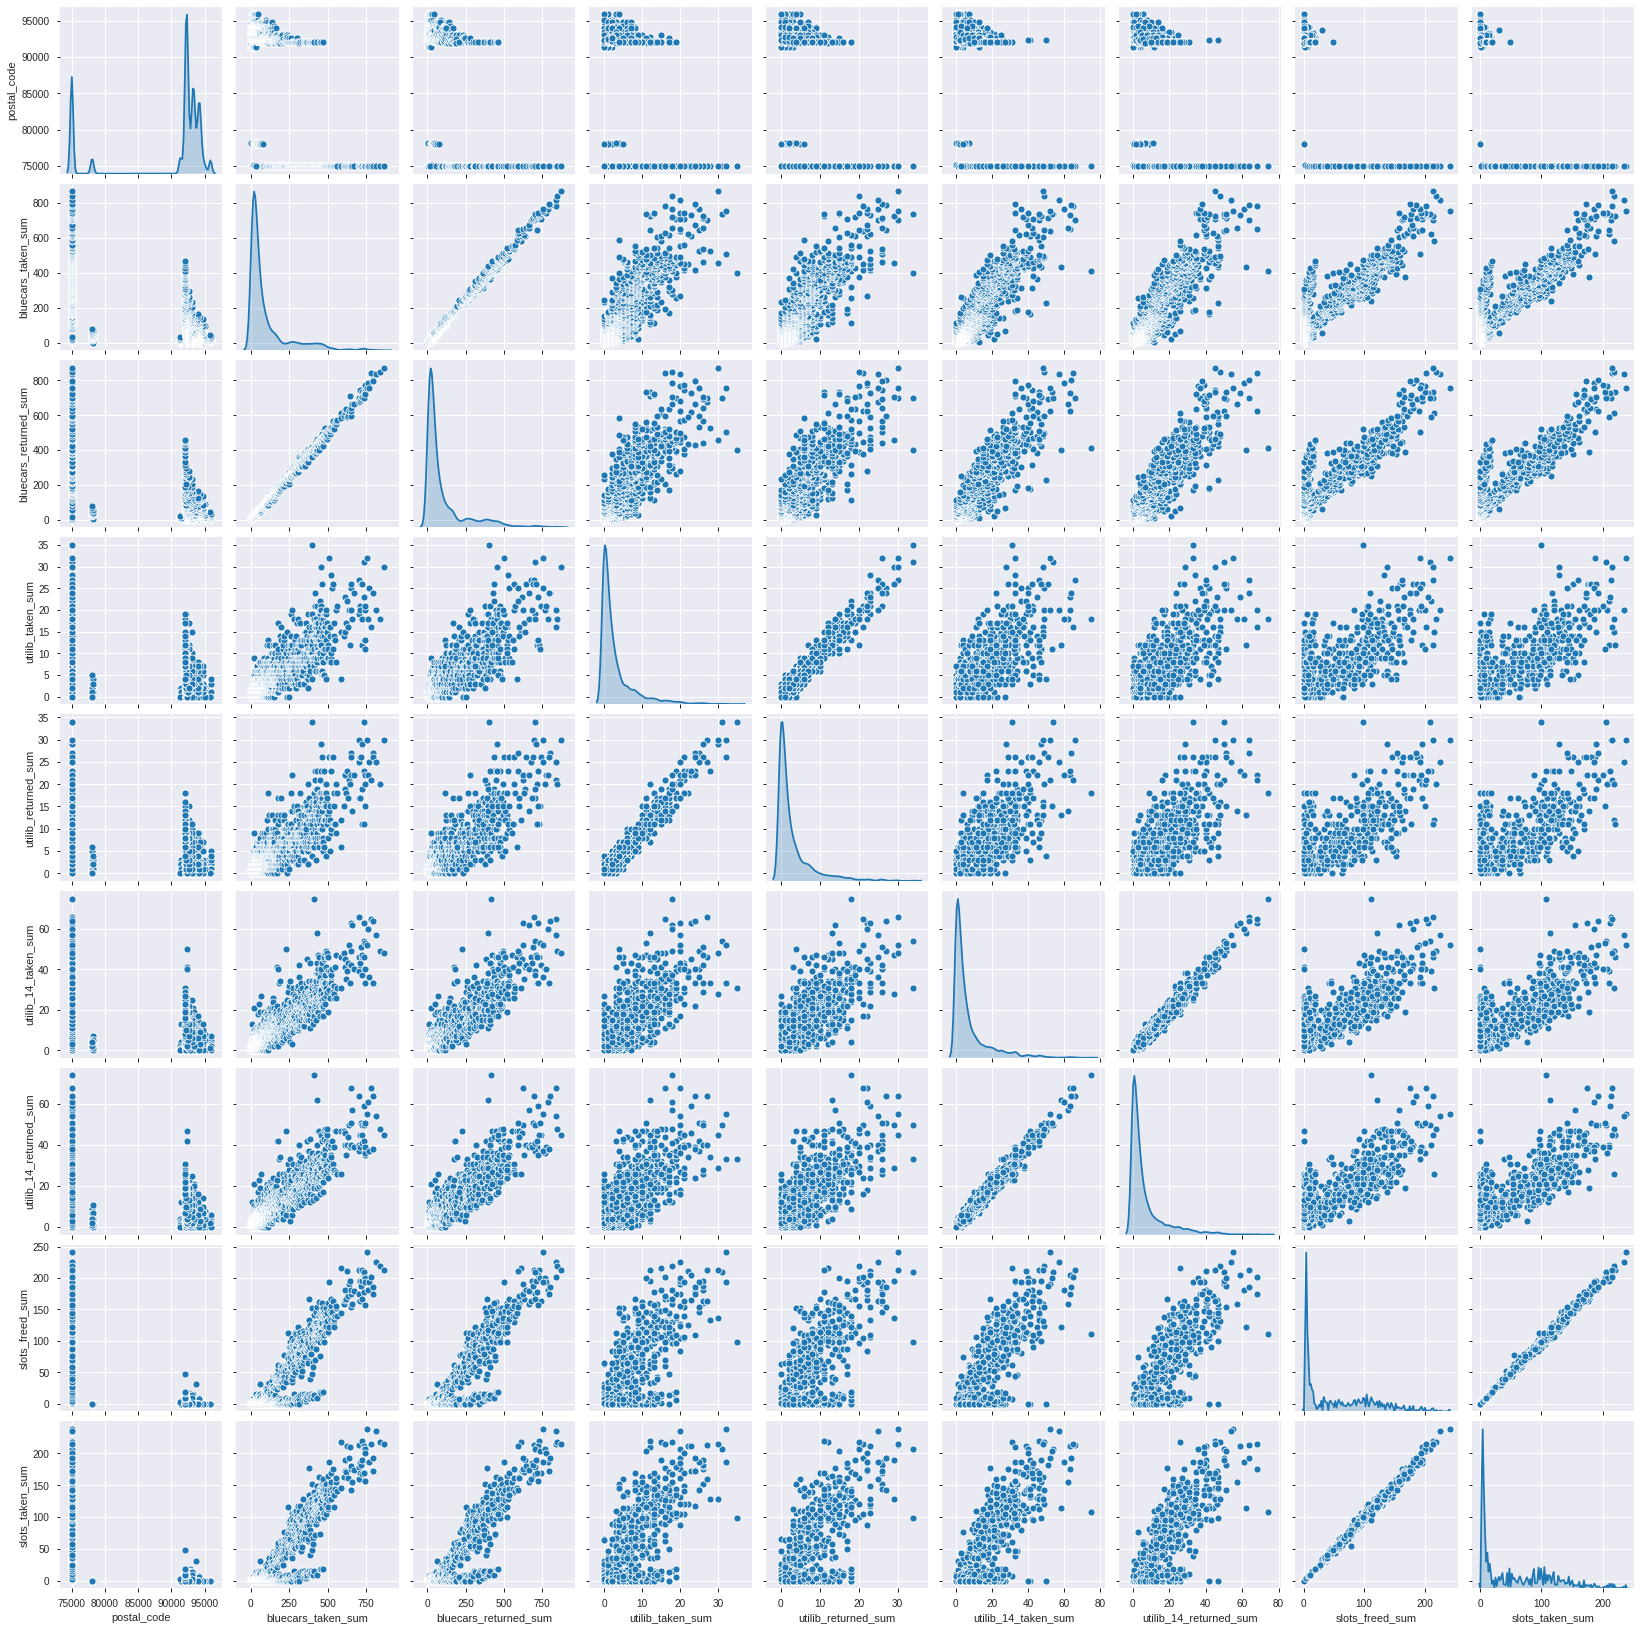

In [ ]:
## Correlation of columns on the dataframe

plt.figure(figsize=(8, 8))
sns.pairplot(df1, diag_kind='kde');

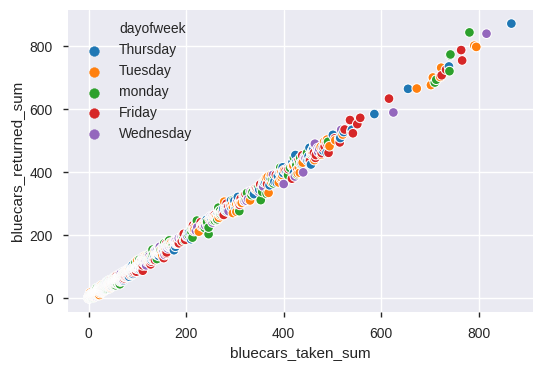

In [ ]:
#Scatter plot of sum of blue cars returned against sum of bluecars taken using days of the week
#
plt.figure(dpi=100)
sns.scatterplot(x='bluecars_taken_sum', y='bluecars_returned_sum', hue='dayofweek', data=strat_auto)


##There is a positive linear correlation. as it gets stronger,The sum of the bluecars taken and sum of bluecars returned,
##increases as the week progresses to the line of besst fit

In [ ]:
# lets check the correlation of the whole dataset

df1.corr()

,postal_code,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
postal_code,1.000000,-0.693591,-0.692916,-0.590018,-0.592841,-0.637749,-0.639306,-0.764973,-0.762810
bluecars_taken_sum,-0.693591,1.000000,0.998271,0.867306,0.873141,0.913863,0.914902,0.914262,0.913211
bluecars_returned_sum,-0.692916,0.998271,1.000000,0.865372,0.871873,0.913477,0.914476,0.913812,0.914149
utilib_taken_sum,-0.590018,0.867306,0.865372,1.000000,0.974493,0.806202,0.802967,0.794256,0.792443
utilib_returned_sum,-0.592841,0.873141,0.871873,0.974493,1.000000,0.814671,0.814088,0.801580,0.800948
utilib_14_taken_sum,-0.637749,0.913863,0.913477,0.806202,0.814671,1.000000,0.989421,0.849106,0.847761
utilib_14_returned_sum,-0.639306,0.914902,0.914476,0.802967,0.814088,0.989421,1.000000,0.848107,0.847477
slots_freed_sum,-0.764973,0.914262,0.913812,0.794256,0.801580,0.849106,0.848107,1.000000,0.998915
slots_taken_sum,-0.762810,0.913211,0.914149,0.792443,0.800948,0.847761,0.847477,0.998915,1.000000


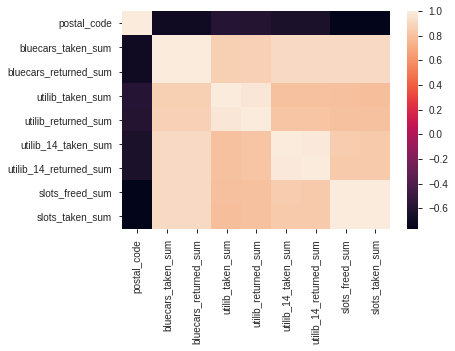

In [ ]:
# Plot the correlation using a heatmap.
# ---
sns.heatmap(df1.corr())

#coment:The black colour shows that there is no linear relationship between the two variables.
#A lighter shade shows that the relationship between the variables is more linear.

From bivariate analysis, we can gather that the day of the week is positively correlated to the bluecars taken sum.Though somewhat insignificant but it affects the overall outcome of the number of bluecars taken. The autolib company needs to be cautious of the day of week to increase the number of bluecars taken. Day 1 which is Tuesday has the highest number of bluecars used in comparison to other weekdays. This should be put into consideration and termed as the day with the most usage of the cars.

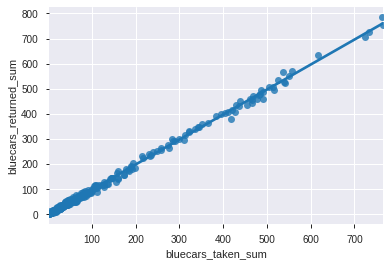

In [ ]:
#multivariate
##
sns.regplot(x='bluecars_taken_sum', y='bluecars_returned_sum', data=df2)

#There is a positive linear relationship between the sum of bluecars taken and sum of bluecars returned
#therefore as bluecars taken increases so does the bluecars returned increases

VERIFY THE HYPOTHESIS

In [ ]:
df2 = df1[(df1.dayofweek == 'Friday')]
df2.bluecars_taken_sum = df1.bluecars_taken_sum


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df2.dayofweek.value_counts()
df2.head()

,postal_code,date,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
11970,93390,2018-01-19,Friday,1,2,0,0,0,0,0,0
12210,93440,2018-01-19,Friday,2,3,0,0,0,1,0,0
10471,93150,2018-02-09,Friday,2,0,2,1,0,0,1,0
10531,93150,2018-04-13,Friday,3,3,2,1,1,0,2,2
11821,93370,2018-01-19,Friday,3,2,0,0,0,0,0,0


In [ ]:
## Using z-test and p-values to verify the hypothesis whether not to be rejected or to be rejected
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(df2['bluecars_taken_sum'], x2=None, value=156)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")


###Reject the null hypothesis as the p-value is less than our alpha (0.05)

1.858664288045248e-10
reject null hypothesis
